In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [28]:
from pathlib import Path
import matplotlib.pyplot as plt

from ErikPytorch.salt_utils import *
from ErikPytorch.datasets import SaltDataset


In [15]:
train_augs = get_tfms(128, val=False)
val_augs = get_tfms(128, val=True)

In [33]:
PATH = Path('/home/lyft/Data/salt/')
train_img, train_mask, val_img, val_mask =  next(cross_val_paths(PATH))

ds = SaltDataset(train_img, train_mask, train_augs)

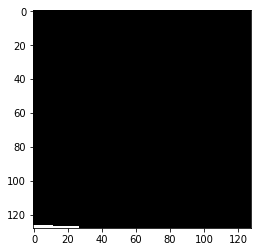

In [43]:
plt.imshow(ds[10][1])

In [44]:
train_mask[10]

'/home/lyft/Data/salt/train/masks/4989c6509e.png'

In [36]:
ds = SaltDataset(train_images, train_masks, train_augs)

In [38]:
img, mask = ds[0]

In [39]:
img.shape

(128, 128, 3)

In [47]:
import pretrainedmodels

In [50]:
dpn = pretrainedmodels.models.dpn107()

In [79]:
mod = next(dpn.modules())

In [88]:
next(mod.children())

Sequential(
  (conv1_1): InputBlock(
    (conv): Conv2d(3, 128, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (act): ReLU(inplace)
    (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv2_1): DualPathBlock(
    (c1x1_w_s1): BnActConv2d(
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace)
      (conv): Conv2d(128, 296, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (c1x1_a): BnActConv2d(
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace)
      (conv): Conv2d(128, 200, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (c3x3_b): BnActConv2d(
      (bn): BatchNorm2d(200, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU(inplace)
      (conv): Conv2d(200, 

In [89]:
mod.items90

AttributeError: 'DPN' object has no attribute 'items90'